In [0]:
# Install TensorFlow
# !pip install -q tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt

# Define Model

In [0]:
class LinearRegression(tf.keras.Model):
  def __init__(self, num_inputs, num_outputs):
    super(LinearRegression, self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

# Create Dataset

In [0]:
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

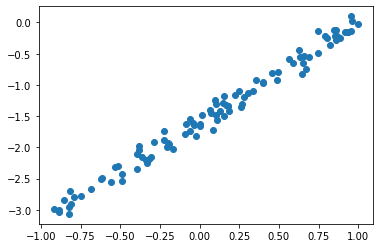

In [0]:
plt.scatter(X, Y)

# Data Preprocessing

In [0]:
# Cast type from double to flat
X = X.astype(np.float32)
Y = Y.astype(np.float32)


# Build Gradient Descent Functions

In [0]:
# Define the loss

# Loss
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  loss = tf.reduce_mean(tf.square(error))
  
  return loss

# Gradient
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss = get_loss(model, inputs, targets)
  grad = tape.gradient(loss, model.params)

  return grad

In [0]:
model = LinearRegression(D, K)

# Train Model

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

losses = []

# Apply gradients with optimizer to reduce loss
for i in range(50):

  grad = get_grad(model, X, Y)
  optimizer.apply_gradients(zip(grad, model.params))
  loss = get_loss(model, X, Y)
  losses.append(loss)


# Evaluate Model

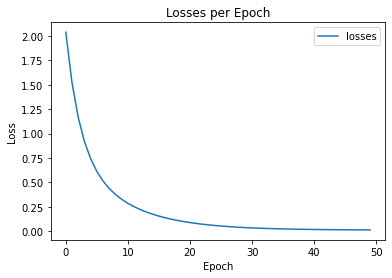

In [0]:
plt.plot(losses, label="losses")
plt.title("Losses per Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

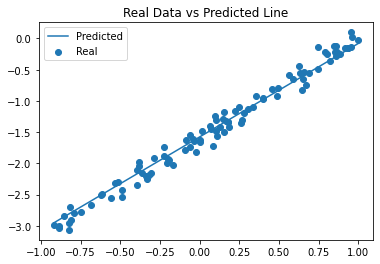

In [77]:
x_test = np.linspace(X.min(), X.max(), 100)
y_test = model.predict(x_test)

plt.scatter(X, Y, label='Real')
plt.plot(x_test, y_test, label='Predicted')
plt.title("Real Data vs Predicted Line")
plt.legend()

In [0]:
print(f"True param w: {w}")
print(f"Model param w: {model.W}")
print(f"True param b: {b}")
print(f"Model param b: {model.W}")

True param w: [[1.57724583]]
Model param w: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.4968269]], dtype=float32)>
True param b: -1.5816268902961503
Model param b: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.4968269]], dtype=float32)>
